#  DL Practical No. : 6
## Name : Shrujan Kharwadey
## Roll No. : 52
## Section & Batch : B3

## Classifying Clothing ittems using Tensorflow 2.x

In [3]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

### Preparing the data

In [ ]:
# Loading MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Data Preprocessing

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784.
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

# Data is converted into float32 to use 32-bit precision when training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the input to be within the range [0,1]
X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [ ]:
# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

### Designing the Model

#### Preparing the Model 0: Single layer Perceptron

Building the `Sequential` model with 0 hidden layers. Choosing an optimizer and loss function for training:

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()

In [ ]:
# Now the model will take as input arrays of shape (*, 784)
# And Output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model.
model_0.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5798 - loss: 1.3683 - val_accuracy: 0.7565 - val_loss: 0.7606
Epoch 2/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7598 - loss: 0.7410 - val_accuracy: 0.7884 - val_loss: 0.6560
Epoch 3/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7913 - loss: 0.6540 - val_accuracy: 0.8021 - val_loss: 0.6064
Epoch 4/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8086 - loss: 0.5996 - val_accuracy: 0.8085 - val_loss: 0.5781
Epoch 5/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8123 - loss: 0.5784 - val_accuracy: 0.8148 - val_loss: 0.5579
Epoch 6/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8204 - loss: 0.5542 - val_accuracy: 0.8190 - val_loss: 0.5415
Epoch 7/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8256 - loss: 0.5378 - val_accuracy: 0.8224 - val_loss: 0.5298
Epoch 8/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8282 - loss: 0.5263 - val_accuracy: 0.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Listing all data in training
print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


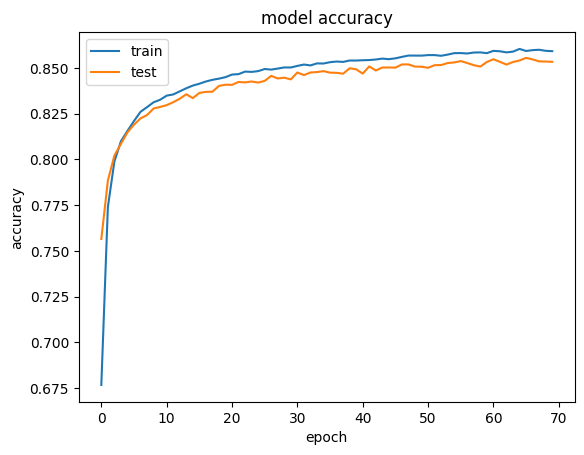

In [ ]:
# Summarizing training for accuracy

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

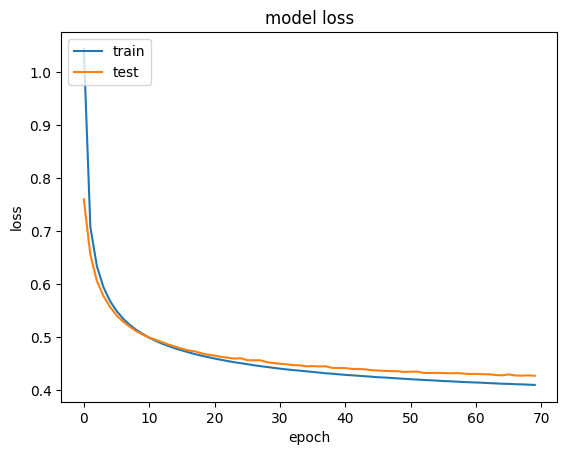

In [ ]:
# Summarizing traning for loss

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Evaluating the model

test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.4455
Test accuracy: 0.8396000266075134


In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,852 (30.68 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#### Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron

In [ ]:
#Most common type of model is stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64

#Adding a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden , name = 'dense_layer' , input_shape = (784,) , activation = 'relu'))

model_1.add(Dense(N_hidden , name = 'dense_layer2' , activation = 'relu'))

model_1.add(Dense(10 , name = 'dense_layer3' , activation = 'softmax'))

In [ ]:
#Compiling the model
model_1.compile(optimizer = 'SGD' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
#Training the model
training = model_1.fit(X_train , Y_train , batch_size = 64 , epochs = 100 , validation_split = 0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5495 - loss: 1.4304 - val_accuracy: 0.7532 - val_loss: 0.6925
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7748 - loss: 0.6508 - val_accuracy: 0.8004 - val_loss: 0.5740
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8095 - loss: 0.5591 - val_accuracy: 0.8180 - val_loss: 0.5161
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8225 - loss: 0.5071 - val_accuracy: 0.8218 - val_loss: 0.4992
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8360 - loss: 0.4772 - val_accuracy: 0.8328 - val_loss: 0.4707
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8395 - loss: 0.4633 - val_accuracy: 0.8409 - val_loss: 0.4515
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8477 - loss: 0.4363 - val_accuracy: 0.8360 - val_loss: 0.4577
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8481 - loss: 0.4325 - val_accu

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


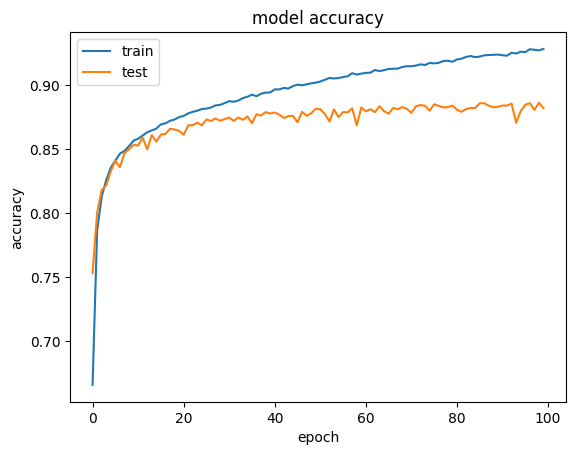

In [ ]:
# Summarizing training for accuracy

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

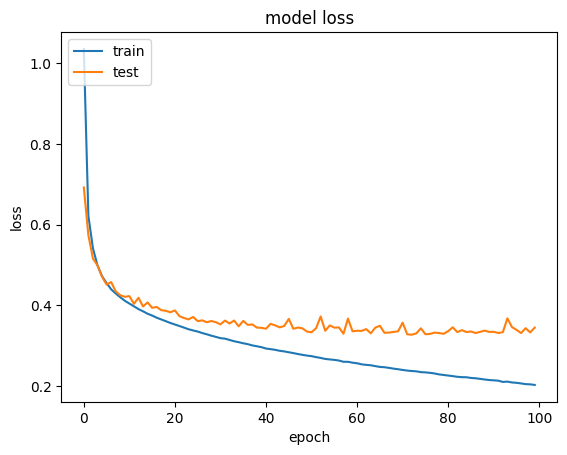

In [ ]:
# Summarizing training for loss

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model
test_loss , test_acc = model_1.evaluate(X_test , Y_test)
print('Test accuracy : ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8759 - loss: 0.3600
Test accuracy :  0.8755000233650208


In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer2 (Dense)                 │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer3 (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,052 (215.05 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_1.weights

[<Variable path=sequential_1/dense_layer/kernel, shape=(784, 64), dtype=float32, value=[[ 0.01080724 -0.03877109  0.06082521 ... -0.03292297  0.01127034
    0.06327945]
  [ 0.007476    0.03272592  0.01845551 ... -0.02668094  0.07540774
   -0.08146663]
  [ 0.06672609 -0.05960947  0.01752718 ... -0.07543421 -0.0586587
   -0.00278405]
  ...
  [ 0.08524934  0.02862733 -0.03431971 ... -0.02010771 -0.07436146
    0.02966987]
  [ 0.07483494  0.01279532  0.09920233 ... -0.06215668 -0.07441784
    0.00774341]
  [-0.01092106 -0.0060958  -0.07576849 ... -0.04537689  0.05092423
   -0.04412058]]>,
 <Variable path=sequential_1/dense_layer/bias, shape=(64,), dtype=float32, value=[ 0.04828075  0.33389762 -0.15445475  0.01389467 -0.07988112 -0.0047144
   0.03093898 -0.01640195  0.07023107  0.24131092  0.17562272 -0.0066801
   0.07457893  0.00275344 -0.04973519 -0.08043569  0.13127066 -0.06153195
   0.2094826  -0.26017782  0.00624734  0.5107937  -0.07334094  0.24029663
   0.10366739 -0.17771667  0.23971

#### Improved Model 2 - Adding Dropout to Avoid Overfitting

In [ ]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128

# Adding a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model_2.add(Dropout(0.3))

# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Adding an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
#Compiling the model
model_2.compile(optimizer = 'SGD' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
#Training the model
training = model_2.fit(X_train , Y_train , batch_size = 64 , epochs = 50 , validation_split = 0.2 )

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4389 - loss: 1.5998 - val_accuracy: 0.7482 - val_loss: 0.7358
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7005 - loss: 0.8488 - val_accuracy: 0.7952 - val_loss: 0.6033
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7545 - loss: 0.7015 - val_accuracy: 0.8123 - val_loss: 0.5431
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7819 - loss: 0.6307 - val_accuracy: 0.8247 - val_loss: 0.5050
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7947 - loss: 0.5881 - val_accuracy: 0.8321 - val_loss: 0.4827
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8055 - loss: 0.5595 - val_accuracy: 0.8319 - val_loss: 0.4676
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8111 - loss: 0.5338 - val_accuracy: 0.8378 - val_loss: 0.4510
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8228 - loss: 0.5127 - val_accuracy: 0.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


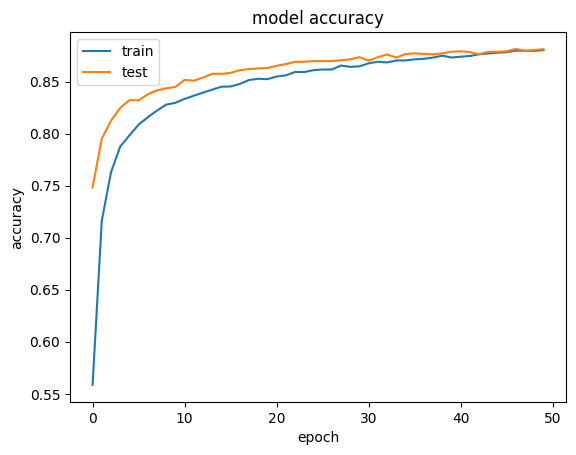

In [ ]:
# Summarizng training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

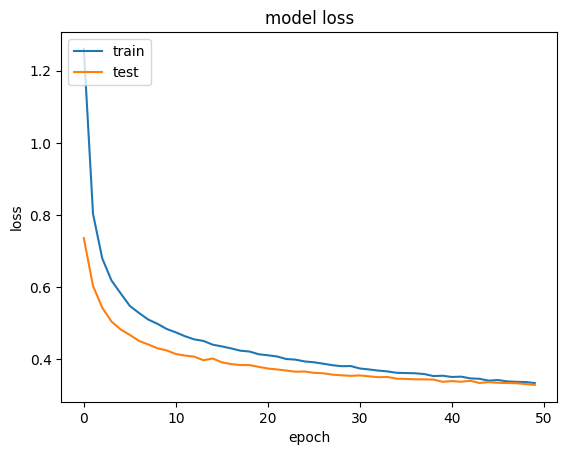

In [ ]:
# Summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_2.weights[0]

<Variable path=sequential_2/dense_layer/kernel, shape=(784, 128), dtype=float32, value=[[ 0.00561023  0.06980438 -0.05770398 ...  0.0458487   0.03938283
  -0.01051193]
 [-0.0432436   0.01551446  0.01565635 ... -0.07039127 -0.03775485
   0.02685705]
 [ 0.07849593  0.00658078  0.08120436 ... -0.04102171  0.05066822
  -0.07658605]
 ...
 [ 0.03139528  0.01089263 -0.02275651 ... -0.01829788 -0.03300005
   0.05566204]
 [-0.04408327 -0.0563628   0.07025455 ...  0.0350644  -0.0614877
  -0.01816177]
 [-0.07512791  0.03035319  0.0627976  ... -0.07375714  0.06140793
  -0.02243633]]>

In [ ]:
#Evaluating the model
test_loss , test_acc = model_2.evaluate(X_test , Y_test)
print('Test accuracy : ',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.3474
Test accuracy :  0.8727999925613403


In [ ]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,284 (462.05 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2.weights

[<Variable path=sequential_2/dense_layer/kernel, shape=(784, 128), dtype=float32, value=[[ 0.00561023  0.06980438 -0.05770398 ...  0.0458487   0.03938283
   -0.01051193]
  [-0.0432436   0.01551446  0.01565635 ... -0.07039127 -0.03775485
    0.02685705]
  [ 0.07849593  0.00658078  0.08120436 ... -0.04102171  0.05066822
   -0.07658605]
  ...
  [ 0.03139528  0.01089263 -0.02275651 ... -0.01829788 -0.03300005
    0.05566204]
  [-0.04408327 -0.0563628   0.07025455 ...  0.0350644  -0.0614877
   -0.01816177]
  [-0.07512791  0.03035319  0.0627976  ... -0.07375714  0.06140793
   -0.02243633]]>,
 <Variable path=sequential_2/dense_layer/bias, shape=(128,), dtype=float32, value=[ 4.85719293e-02 -2.04640314e-01  1.53302222e-01 -2.47505069e-01
   4.91681360e-02 -7.13341758e-02  4.59327586e-02  4.77206409e-02
  -1.12210084e-02 -5.66426367e-02  2.54099190e-01  5.45590669e-02
  -4.24459577e-02 -1.16989706e-02  1.82523370e-01  7.82127827e-02
  -2.04741843e-02  1.73172817e-01  1.32274270e-01  1.50414318e

In [ ]:
model_2.get_config()

{'name': 'sequential_2',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_2'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kerne

#### Improved Model 3: Changing the Optimizer - Adam

In [ ]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64

# Adding a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))

# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))

model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5478 - loss: 1.2910 - val_accuracy: 0.8213 - val_loss: 0.4978
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7906 - loss: 0.6006 - val_accuracy: 0.8424 - val_loss: 0.4383
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8173 - loss: 0.5222 - val_accuracy: 0.8463 - val_loss: 0.4163
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8276 - loss: 0.4844 - val_accuracy: 0.8579 - val_loss: 0.3964
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8374 - loss: 0.4602 - val_accuracy: 0.8565 - val_loss: 0.3857
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8443 - loss: 0.4450 - val_accuracy: 0.8645 - val_loss: 0.3821
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8502 - loss: 0.4239 - val_accuracy: 0.8651 - val_loss: 0.3696
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8482 - loss: 0.4190 - val_accuracy: 0.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


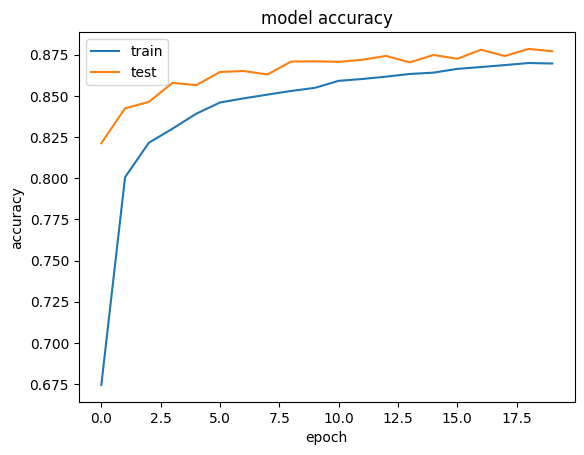

In [ ]:
# Summarizing training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

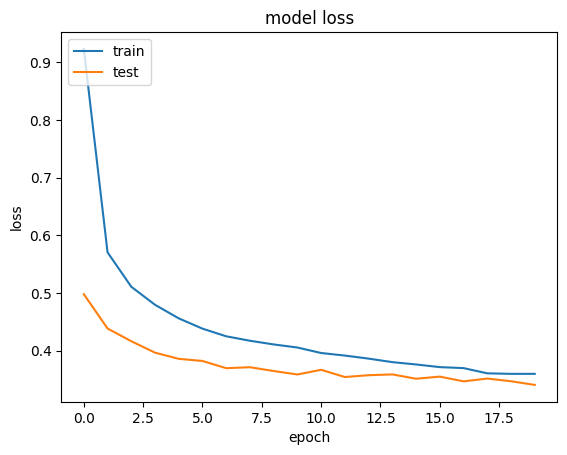

In [ ]:
# Summarizing traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Evaluating the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8730 - loss: 0.3535
Test accuracy: 0.8707000017166138


In [ ]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,152 (645.13 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 110,102 (430.09 KB)

In [ ]:
model_3.weights

[<Variable path=sequential_3/dense_layer/kernel, shape=(784, 64), dtype=float32, value=[[-0.07656157  0.06939093  0.13494907 ... -0.02764368  0.04661382
   -0.08113867]
  [-0.00146969 -0.01317793 -0.00575316 ... -0.01555309 -0.06147546
    0.08409408]
  [ 0.08401998 -0.13898    -0.19690844 ...  0.1081938  -0.02957553
   -0.00383589]
  ...
  [ 0.02219089  0.04094774  0.244674   ... -0.12557429 -0.00669693
   -0.12676343]
  [-0.01754885 -0.09947702  0.2416129  ... -0.12833817 -0.07501289
    0.02357688]
  [ 0.01561709  0.00784486  0.2845134  ... -0.08087162  0.02045269
    0.06691537]]>,
 <Variable path=sequential_3/dense_layer/bias, shape=(64,), dtype=float32, value=[-0.01389187  0.09524565 -0.14046925 -0.00753488 -0.02923339  0.2816015
   0.1324124  -0.24620357 -0.07830571 -0.02504124 -0.6793384  -0.00529739
   0.0775549   0.05500786  0.12805225 -0.024381   -0.04759477  0.22418419
   0.590265    0.05216246  0.21685007 -0.04304745  0.37485558 -0.04509269
  -0.04620941  0.4015599  -0.253

In [ ]:
model_3.get_config()

{'name': 'sequential_3',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_3'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel

#### Improved Model 4: Increasing the number of Hidden Layer neuron

In [ ]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512

# Adding a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))

# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))

# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2)

Epoch 1/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7337 - loss: 0.7518 - val_accuracy: 0.8446 - val_loss: 0.4189
Epoch 2/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8455 - loss: 0.4224 - val_accuracy: 0.8668 - val_loss: 0.3627
Epoch 3/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.3812 - val_accuracy: 0.8771 - val_loss: 0.3443
Epoch 4/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8712 - loss: 0.3461 - val_accuracy: 0.8736 - val_loss: 0.3497
Epoch 5/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8739 - loss: 0.3379 - val_accuracy: 0.8820 - val_loss: 0.3304
Epoch 6/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8805 - loss: 0.3290 - val_accuracy: 0.8863 - val_loss: 0.3179
Epoch 7/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8839 - loss: 0.3095 - val_accuracy: 0.8812 - val_loss: 0.3180
Epoch 8/31
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8866 - loss: 0.3044 - val_accuracy: 0.

In [ ]:
#Evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8882 - loss: 0.3381
Test accuracy: 0.8902000188827515


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


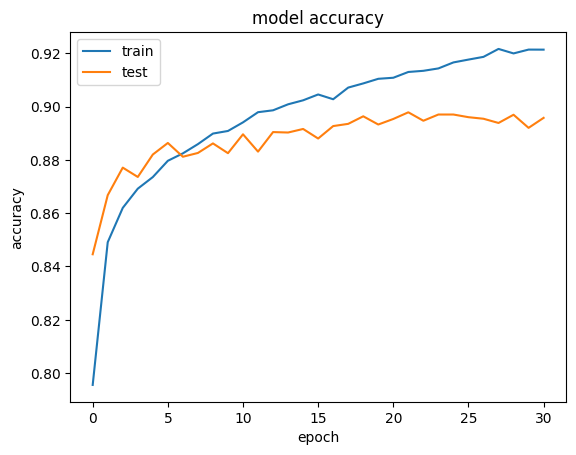

In [ ]:
# Summarizing training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

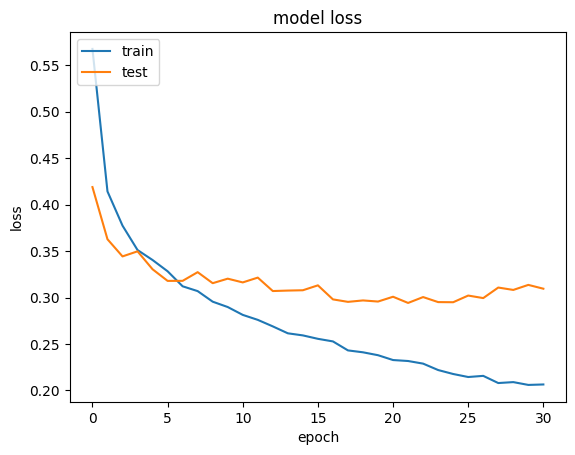

In [ ]:
# Summarizing traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,009,120 (7.66 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,339,414 (5.11 MB)

In [ ]:
model_4.weights

[<Variable path=sequential_4/dense_layer/kernel, shape=(784, 512), dtype=float32, value=[[ 0.00757102 -0.0126681  -0.002109   ... -0.28701088  0.00686169
   -0.06140326]
  [ 0.08719858  0.04353143 -0.06935089 ... -0.25510344  0.03209064
    0.01754873]
  [ 0.36605403 -0.0865925  -0.08897513 ... -0.22556321 -0.00068344
    0.02809396]
  ...
  [-0.2456553  -0.04355163 -0.07670547 ... -0.05438009  0.04215553
   -0.0217827 ]
  [-0.10898499  0.05988137 -0.13267143 ... -0.16355725 -0.0223232
   -0.01108688]
  [-0.10671961  0.03904534  0.05224867 ... -0.14335704 -0.05591822
   -0.00260117]]>,
 <Variable path=sequential_4/dense_layer/bias, shape=(512,), dtype=float32, value=[ 8.99342224e-02  3.08399387e-02  9.51585993e-02  5.51242232e-02
   1.12751491e-01  1.15600221e-01 -2.31624678e-01  2.18138486e-01
   3.08127552e-02 -1.21291913e-01  6.07339740e-02  1.63680032e-01
  -2.39169337e-02 -5.67147695e-02  1.54534414e-01  9.64052882e-03
   1.31928278e-02  2.03037903e-01  1.00973472e-01 -1.96683854e

In [ ]:
model_4.get_config()

{'name': 'sequential_4',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_4'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kerne

#### Improved Model 5: Manipulating the batch size

In [ ]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512

# Adding a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))

# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))

# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_5.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7436 - loss: 0.7133 - val_accuracy: 0.8521 - val_loss: 0.4025
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8437 - loss: 0.4312 - val_accuracy: 0.8616 - val_loss: 0.3946
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8587 - loss: 0.3874 - val_accuracy: 0.8597 - val_loss: 0.3766
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8678 - loss: 0.3612 - val_accuracy: 0.8775 - val_loss: 0.3323
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8741 - loss: 0.3447 - val_accuracy: 0.8774 - val_loss: 0.3391
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8766 - loss: 0.3335 - val_accuracy: 0.8798 - val_loss: 0.3335
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8789 - loss: 0.3266 - val_accuracy: 0.8817 - val_loss: 0.3180
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8846 - loss: 0.3082 - val_accuracy: 0.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


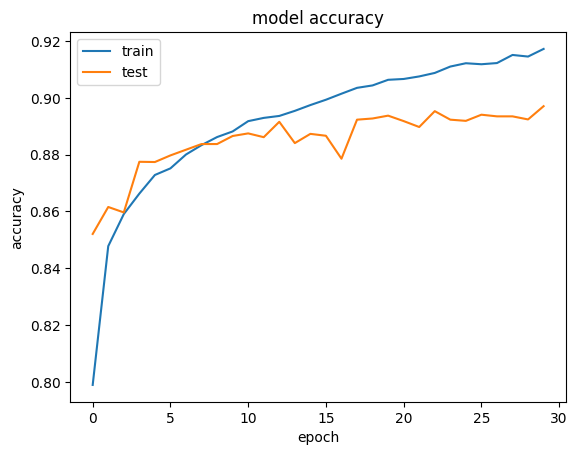

In [ ]:
# Summarizing training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

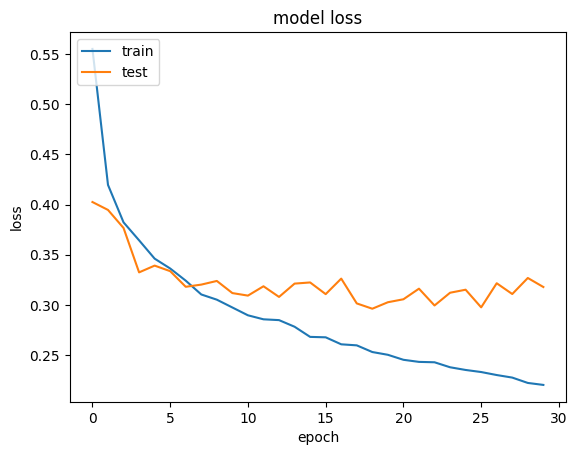

In [ ]:
# Summarizing traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Evaluating the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8898 - loss: 0.3342
Test accuracy: 0.8876000046730042


In [ ]:
model_5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,009,120 (7.66 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,339,414 (5.11 MB)

In [ ]:
model_5.weights

[<Variable path=sequential_5/dense_layer/kernel, shape=(784, 512), dtype=float32, value=[[ 0.02099827 -0.02488415  0.06189317 ...  0.02650075  0.05650564
   -0.03760268]
  [ 0.0326849  -0.02388162  0.01479421 ...  0.03629188  0.04916702
    0.0189072 ]
  [-0.03383493 -0.0603925  -0.05492549 ...  0.05379111 -0.05903924
    0.02912284]
  ...
  [-0.10168745  0.02932113 -0.02353091 ... -0.1254828  -0.0020736
   -0.03950975]
  [ 0.00453503 -0.05151724 -0.02149657 ...  0.0262144  -0.00580992
   -0.08680807]
  [ 0.00211537  0.04510362 -0.05294997 ... -0.09721123  0.08946837
   -0.07154679]]>,
 <Variable path=sequential_5/dense_layer/bias, shape=(512,), dtype=float32, value=[ 2.05316663e-01 -1.91340763e-02 -1.17593892e-02 -1.70307439e-02
   1.38046652e-01 -1.92872286e-02  2.19552070e-01 -6.05192184e-02
   3.71100893e-03 -1.47346497e-01  2.56879777e-01 -1.91634241e-02
   4.34977919e-01 -4.50006500e-02  4.29542840e-01 -2.03575455e-02
   3.78631614e-02  5.86134605e-02  3.83936822e-01 -1.01637505e

In [ ]:
model_5.get_config()

{'name': 'sequential_5',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_5'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kerne

#### Improved Model 6: Adding Another Hidden Layer to the Model

In [ ]:
import tensorflow as tf

#In Keras, layers are assembled to build models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_6.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7241 - loss: 0.7569 - val_accuracy: 0.8439 - val_loss: 0.4134
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8366 - loss: 0.4413 - val_accuracy: 0.8609 - val_loss: 0.3838
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8539 - loss: 0.4020 - val_accuracy: 0.8608 - val_loss: 0.3664
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8571 - loss: 0.3827 - val_accuracy: 0.8662 - val_loss: 0.3661
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8660 - loss: 0.3660 - val_accuracy: 0.8747 - val_loss: 0.3436
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8713 - loss: 0.3532 - val_accuracy: 0.8777 - val_loss: 0.3406
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8754 - loss: 0.3446 - val_accuracy: 0.8756 - val_loss: 0.3544
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8781 - loss: 0.3322 - val_accuracy: 0.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


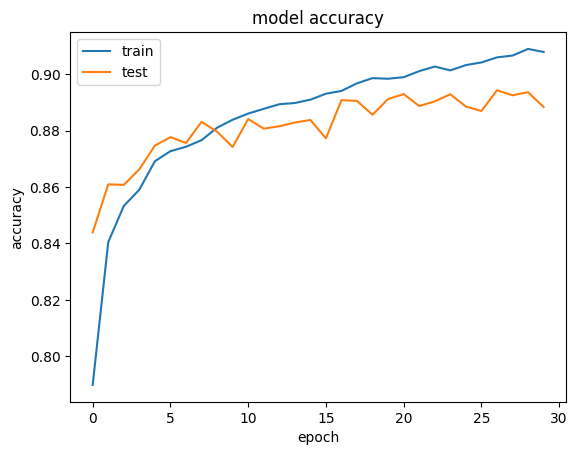

In [ ]:
# Summarizing training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

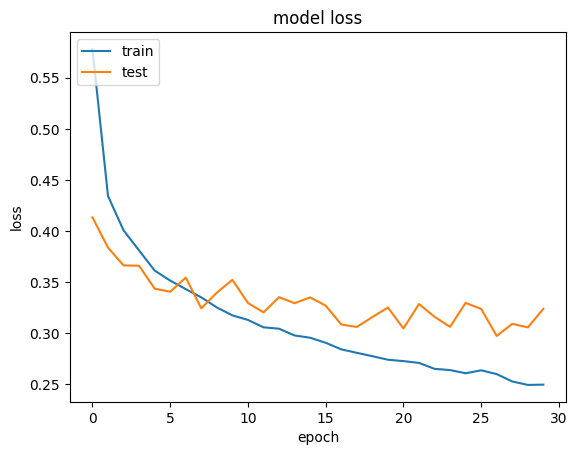

In [ ]:
# Summarizing traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_6.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_4 (Dense)                │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,797,088 (10.67 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,864,726 (7.11 MB)

In [ ]:
model_6.weights

[<Variable path=sequential_6/dense_layer/kernel, shape=(784, 512), dtype=float32, value=[[-0.03219258  0.01979236  0.05700715 ...  0.06346796  0.30214095
    0.03889338]
  [-0.0411438   0.06172475 -0.06340533 ... -0.04729802  0.291441
   -0.07171958]
  [-0.03857104 -0.03149366  0.01597655 ... -0.0390332   0.21906772
   -0.06537043]
  ...
  [-0.03695926 -0.04890653 -0.01314913 ...  0.20888352 -0.11679764
    0.01035617]
  [ 0.02476981 -0.03703157  0.01611172 ...  0.18657097 -0.03084661
    0.06907161]
  [ 0.032336   -0.02449022  0.05424642 ...  0.24520704  0.10257884
   -0.02262706]]>,
 <Variable path=sequential_6/dense_layer/bias, shape=(512,), dtype=float32, value=[-1.97391380e-02 -9.18766297e-03  1.72437436e-03  4.56431478e-01
  -9.67814587e-03  9.48948637e-02 -3.37432742e-01 -1.00206593e-02
  -6.04832964e-03 -6.07644767e-03  6.06127083e-02 -2.28044596e-02
   2.81573106e-02 -4.04009014e-01 -1.11027926e-01  2.91931957e-01
  -3.12615871e-01  6.20826408e-02  2.16610208e-02  7.80422091e-

In [ ]:
model_6.get_config()

{'name': 'sequential_6',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_6'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kerne